# Read these instructions completely in order to receive full credit

- Before you submit the problem set, make sure everything runs as expected. Go to the menu bar at the top of Jupyter Notebook and click `Kernel > Restart & Run All`. Your code should run from top to bottom with no errors. Failure to do this will result in loss of points.

- You should not use `install.packages()` anywhere. You may assume that we have already installed all the packages needed to run your code.

- Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE" and delete the `stop()` functions. The `stop()` functions produce an error and are there to remind you of cells that need an answer.

- If you are working in a group, make sure you and your collaborators have been added to a group on Canvas as described at the beginning of lecture 2.
- As a backup, *also* fill in your uniqid as well as those of your collaborators below:

Your uniqid: `<replace with your uniqid>`

Uniqids of your collaborator(s): `<replace with their uniqids>`

- **Carefully proofread the PDF that you upload to Canvas. PDFs that have missing or truncated code cannot be graded and will not receive credit.**

---

In [ ]:
library(tidyverse)
library(modelr)
library(broom)

# STATS 306
## Problem Set 10
Each problem is worth one point, for a total of ten.

The first part of the problem set picks up where we left off in lecture discussing additional aspects of the HIV/AIDS epidemic.

#### Problem 1
The series `HIV_0000000006` contains information on the number of deaths due to HIV in various countries and regions:

In [ ]:
hiv.deaths <- WHO::get_data('HIV_0000000006') %>% print 

The `value` column of `hiv_deaths` contains point estimates and error bars, and is not in a usable format. Convert it to three numerical columns: `deaths`, `lb`, and `ub`. Properly encode missing data. Countries with a very small number of deaths, for example Algeria, are coded using inequalities: `<100 [<100–<100]`. You may drop these countries before cleaning up the remaining rows.

In [ ]:
# YOUR CODE HERE
stop()

#### Problem 2
Use the cleaned version of these data to visualize the number of deaths due to HIV in each country:

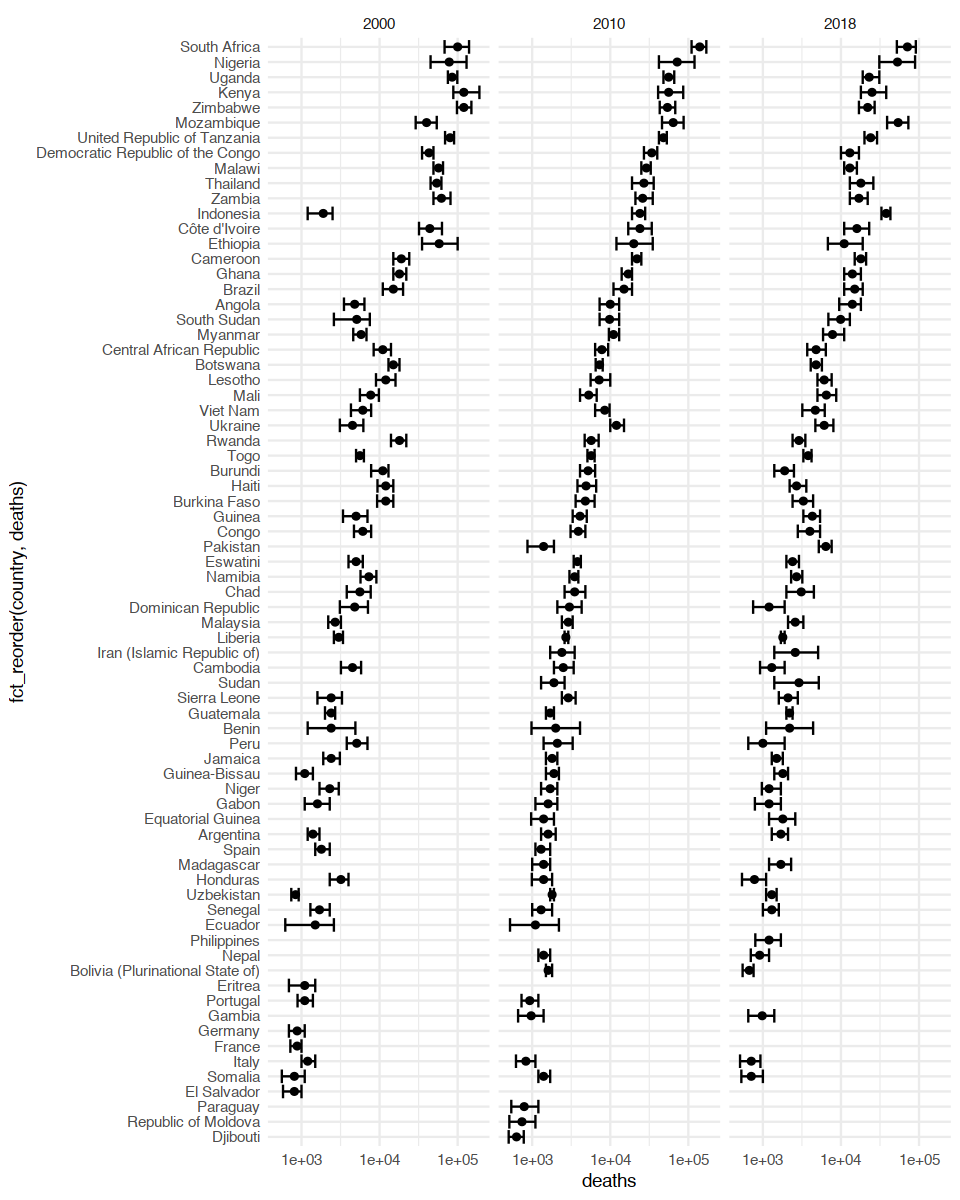

In [ ]:
# YOUR CODE HERE
stop()

#### Problem 3
Next, let's look at the effect that antiretroviral therapy had on the AIDS epidemic. The series `HIV_ARTCOVERAGE` contains information on this topic.

In [ ]:
art <- WHO::get_data('HIV_ARTCOVERAGE') %>% print

Using the same procedure as above, clean these data so that they are in a usable format.

In [ ]:
# YOUR CODE HERE
stop()

#### Problem 4
How does the change in deaths due to HIV correlate with availability of ART drugs in each country? Produce an appropriate visualization.

In [ ]:
# YOUR CODE HERE
stop()

#### Problem 5
Use an appropriate regression model to study the effect of ART availability on the HIV death rate over the period 2010-2018. Summarize your findings.

In [ ]:
# YOUR CODE HERE
stop()

#### Problem 6
Highly active antiretroviral therapy (HAART) is a special class of drugs which are extremely effective at combatin HIV. HAART became available in South Africa beginning in 2004. It is easy to see this in the data:

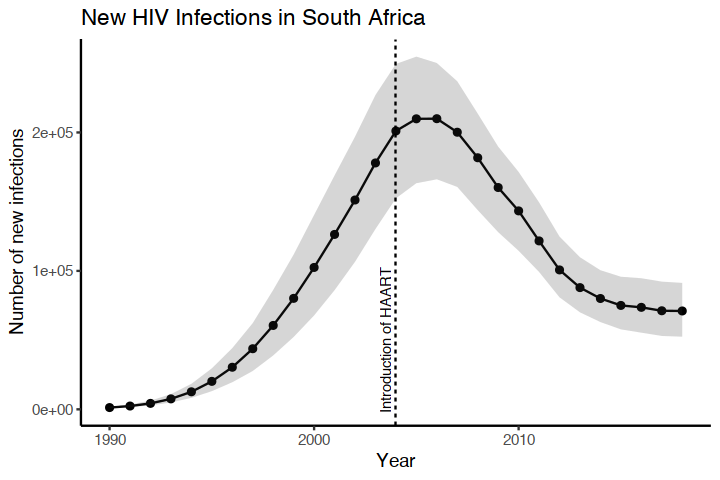

([Source](http://aidsinfo.unaids.org?did=5b4eaa7cdddb54192bb39714&r=world&t=null&tb=g&bt=gnli&ts=0,0&gid=5b4ed25607dc1a461caf7a96&gr=ZAF))

Using these or other sources and regression, investigate the following question: how many lives did the introduction of HAART save in South Africa?

In [ ]:
# YOUR CODE HERE
stop()

### Prediction vs. Interpretation
Thus far we have mainly focused on using regression to *interpret* the relationship between explanatory variables and an outcome. In some settings we are more concerned with *predicting* an outcome on the basis of new, unseen explanatory variables. 

In the next few exercises you will explore various methods for building a predictive models of diamond price. To check the predictive accuracy we will divide the `diamonds` table into a training and test dataset:

In [ ]:
set.seed(1)
n <- nrow(diamonds)
diamonds_k <- mutate(diamonds, l_price = log(price), 
                     l_carat = log(carat), k=row_number())
diamonds.train <- sample_n(diamonds_k, size=n - 5000)
diamonds.test <- anti_join(diamonds_k, diamonds.train, by='k')

To test the predictive accuracy of a model, we will fit the model to `diamonds.train`, and then measure the sum of squared residuals when that model is used to predict `price` on `diamonds.test`. 

For example, the SSR on the test dataset for the simple regression `l_price ~ l_carat` is:

In [ ]:
mdl <- lm(l_price ~ l_carat, data=diamonds.train)
add_residuals(diamonds.test, mdl) %>% summarize(sum(resid^2))

#### Problem 7
If we only care about prediction, then you might think that the best model is the one that includes *all* of the predictors. Show that if you regress `log(price)` on every other variable in `diamonds` (including `carat`), you get a lower SSR:

In [ ]:
# YOUR CODE HERE
stop()

#### Problem 8
Based on the preceding example, it seems like simply adding more variables to the model lowers prediction error. Show that this is not true by computing the test SSR for a regression model which includes all covariables as well as second-order interactions between the predictors. (There will be a total of 310 predictors.) In fact, this model predicts worse than even the simple model `l_price ~ l_carat`.

In [ ]:
# YOUR CODE HERE
stop()

The reason why the model in the preceding problem has worse prediction error is because it [overfits](https://en.wikipedia.org/wiki/Overfitting) to the training dataset. To prevent overfitting, statisticians have developed "shrinkage" methods that improve a model's ability to generalize to new, unseen data points. You can learn more the theory of shrinkage, regularization, overfitting, and generalization in STATS 415. For now, we will go through a couple of practical methods for regularized regression in R.

#### Problem 9
[Ridge regression](https://en.wikipedia.org/wiki/Ridge_regression) is one technique for regularizing a linear model. It is implemented using the `MASS::lm.ridge` function.

Use `lm.ridge()` to fit the second-order interactions model of the preceding problem. The function has a tuning parameter `lambda=` which can be varied to achieve lower test error. By experimenting with `lamba=`, how low of an SSR can you achieve?

Note: the `add_residuals()` command, unfortunately, is not compatible with `lm.ridge()`. To generate predictions for a fitted `lm.ridge()` model on the test data set, you will need to manually multiply the model matrix for `diamonds.test` by the coefficient vector for the fitted ridge regression, which is obtained using the `coef()` function.

In [ ]:
# YOUR CODE HERE
stop()

#### Problem 10
[Random forest regression](https://en.wikipedia.org/wiki/Random_forest) is another technique for regularized regression. The command `randomForest::randomForest()` can be used to perform random forest regression. The method has a tuning parameter `ntree=` which is the number of random trees to grow. By varying `ntree`, how low can you drive the test error? (Note: random forest regression is computationally intensive. You probably do not want to set `ntree` much higher than 20.)

In [ ]:
# YOUR CODE HERE
stop()